<a href="https://colab.research.google.com/github/sidneyjunior0811/Python/blob/main/Cat_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

os.environ['KAGGLE_USERNAME'] = 'sidneyjunior11'
os.environ['KAGGLE_KEY'] = '8d37090fd78cd9cd8cf7b405d475c52d'

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json~/.kaggle/

cp: missing destination file operand after 'kaggle.json~/.kaggle/'
Try 'cp --help' for more information.


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:34<00:00, 41.8MB/s]
100% 1.06G/1.06G [00:34<00:00, 32.7MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

In [9]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [12]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 108ms/step - loss: 0.8996 - accuracy: 0.6216 - val_loss: 0.6954 - val_accuracy: 0.6042
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5762 - accuracy: 0.6963 - val_loss: 0.5952 - val_accuracy: 0.6648
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5051 - accuracy: 0.7504 - val_loss: 0.5538 - val_accuracy: 0.6902
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4338 - accuracy: 0.7961 - val_loss: 0.5853 - val_accuracy: 0.7362
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3601 - accuracy: 0.8361 - val_loss: 0.5927 - val_accuracy: 0.7612
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2953 - accuracy: 0.8686 - val_loss: 0.7957 - val_accuracy: 0.7532
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2325 - accuracy: 0.8946 - val_loss: 0.5238 - val_ac

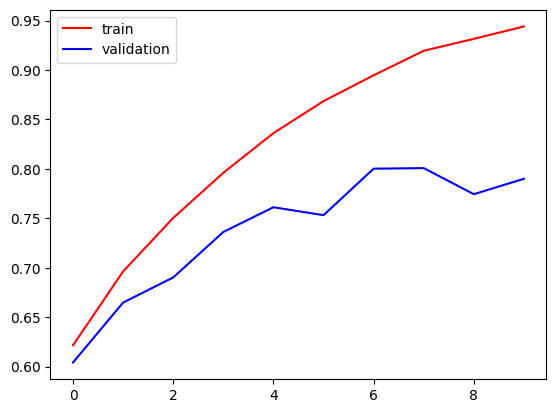

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

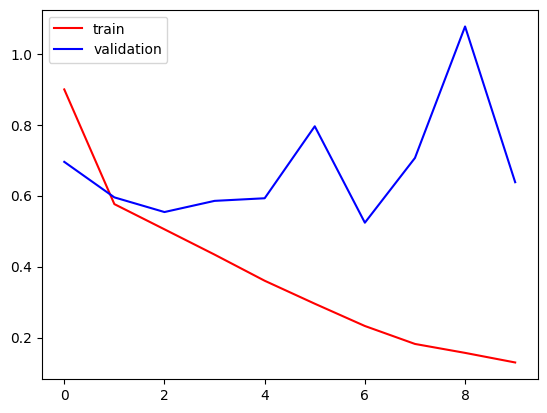

In [15]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [17]:
import cv2

In [50]:
img_cao1 = cv2.imread('/content/cao-pug-isolado-em-um-fundo-branco.jpg')

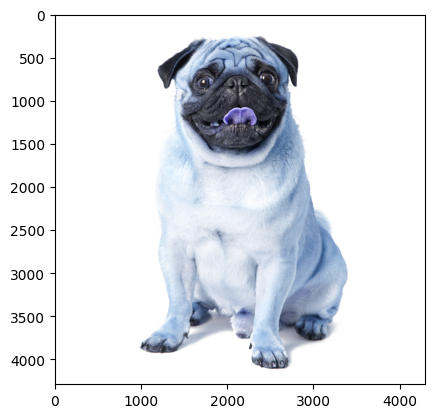

In [51]:
plt.imshow(img_cao1)

In [52]:
print(img_cao1.shape)
teh = cv2.resize(img_cao1,(256,256)) #Resizing to 256x256
teh_in = teh.reshape((1,256,256,3))

(4288, 4289, 3)


In [53]:
teste = model.predict(teh_in)
print(teste)
if teste>0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 21ms/step
[[1.]]
It's a dog!


In [54]:
img_gato = cv2.imread('/content/gato.jpg')

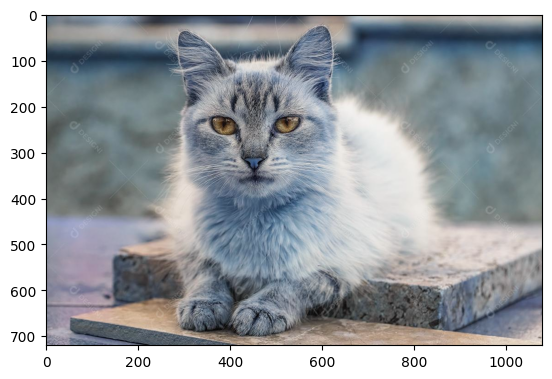

In [55]:
plt.imshow(img_gato)

In [56]:
print(img_gato.shape)
teh2 = cv2.resize(img_gato,(256,256)) #Resizing to 256x256
teh2_in = teh2.reshape((1,256,256,3))

(720, 1080, 3)


In [57]:
teste1 = model.predict(teh2_in)
print(teste1)
if teste1>0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 30ms/step
[[0.]]
It's a cat!


In [58]:
img_cao2 = cv2.imread('/content/dog2.jpg')

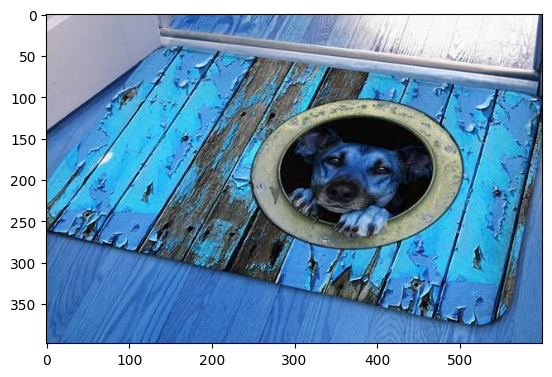

In [59]:
plt.imshow(img_cao2)

In [60]:
print(img_cao2.shape)
teh3 = cv2.resize(img_cao2,(256,256)) #Resizing to 256x256
teh3_in = teh3.reshape((1,256,256,3))

(398, 600, 3)


In [61]:
teste2 = model.predict(teh3_in)
print(teste2)
if teste2>0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 24ms/step
[[1.]]
It's a dog!
